In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/prometeo23-pre-event-ml/sample_submission.csv
/kaggle/input/prometeo23-pre-event-ml/train.csv
/kaggle/input/prometeo23-pre-event-ml/test.csv


In [2]:
train_loc='/kaggle/input/prometeo23-pre-event-ml/train.csv'
train_data=pd.read_csv(train_loc)
train_data.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_759,f_760,f_761,f_762,f_763,f_764,f_765,f_766,f_767,label
0,55.391998,402.842010,1179.939941,137.306000,275.936005,-668.432983,738.448975,509.286987,413.082001,-1350.576050,...,-697.203979,-219.283005,225.966003,-43.695000,626.716980,-295.596985,-635.940979,31.915001,158.291000,4
1,498.306000,118.342003,1222.817993,646.617004,746.257019,-473.803986,-11.617000,-16.693001,269.397003,-613.716003,...,-288.542999,-441.739990,-406.356995,174.936996,532.174011,-443.278992,-68.603996,-493.657013,-368.730011,1
2,1465.275024,-2211.415039,2463.522949,945.344971,922.330994,338.187988,-1548.826050,-818.586975,-1007.841003,79.605003,...,-507.450012,1626.469971,-1210.922974,4531.459961,-2801.270020,2071.193115,-99.113998,-475.681000,2455.382080,3
3,-480.721008,-200.492996,994.544983,429.501007,603.341980,335.571991,-789.293030,315.600006,79.110001,-700.228027,...,190.117996,-141.376999,-158.606995,789.737000,-157.804993,-241.746994,-488.445007,209.561005,-415.536987,4
4,259.115997,-71.842003,489.447998,23.549999,543.088989,-119.539001,-93.567001,55.488998,-235.072998,-773.299011,...,225.546005,-258.687988,-591.017029,359.621002,316.252014,-309.529999,200.304993,-167.130005,44.182999,4


Saving the training data and target data

In [3]:
X=train_data.copy()
y=X['label']
X=X.drop(columns=['label'])
X.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_758,f_759,f_760,f_761,f_762,f_763,f_764,f_765,f_766,f_767
0,55.391998,402.842010,1179.939941,137.306000,275.936005,-668.432983,738.448975,509.286987,413.082001,-1350.576050,...,225.628006,-697.203979,-219.283005,225.966003,-43.695000,626.716980,-295.596985,-635.940979,31.915001,158.291000
1,498.306000,118.342003,1222.817993,646.617004,746.257019,-473.803986,-11.617000,-16.693001,269.397003,-613.716003,...,668.473999,-288.542999,-441.739990,-406.356995,174.936996,532.174011,-443.278992,-68.603996,-493.657013,-368.730011
2,1465.275024,-2211.415039,2463.522949,945.344971,922.330994,338.187988,-1548.826050,-818.586975,-1007.841003,79.605003,...,868.348022,-507.450012,1626.469971,-1210.922974,4531.459961,-2801.270020,2071.193115,-99.113998,-475.681000,2455.382080
3,-480.721008,-200.492996,994.544983,429.501007,603.341980,335.571991,-789.293030,315.600006,79.110001,-700.228027,...,93.406998,190.117996,-141.376999,-158.606995,789.737000,-157.804993,-241.746994,-488.445007,209.561005,-415.536987
4,259.115997,-71.842003,489.447998,23.549999,543.088989,-119.539001,-93.567001,55.488998,-235.072998,-773.299011,...,-150.707001,225.546005,-258.687988,-591.017029,359.621002,316.252014,-309.529999,200.304993,-167.130005,44.182999


Making a first sample using 100 random features just too see what happens

using mutual information for the first 100 features

In [4]:
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores[::] 

f_60     0.050825
f_461    0.048575
f_109    0.048294
f_127    0.048276
f_308    0.046157
           ...   
f_300    0.009042
f_243    0.008841
f_382    0.006009
f_750    0.005235
f_551    0.004383
Name: MI Scores, Length: 768, dtype: float64

trying plotting all the features to find some sort of elbow in the graph

In [5]:
value=mi_scores.iloc[:]
value

f_60     0.050825
f_461    0.048575
f_109    0.048294
f_127    0.048276
f_308    0.046157
           ...   
f_300    0.009042
f_243    0.008841
f_382    0.006009
f_750    0.005235
f_551    0.004383
Name: MI Scores, Length: 768, dtype: float64

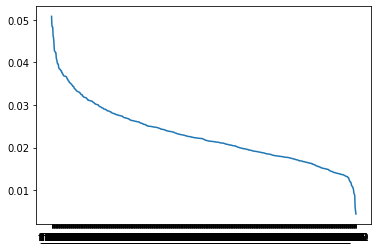

In [6]:
import matplotlib.pyplot as plt
plt.plot(mi_scores.index,mi_scores)

From the graph, it appears to be that the mutual information values start elbowing somewhere around 0.013. Lets select features above that only and see what happens

In [7]:
threshold=0.013
feature=mi_scores
# Find the indexes of the rows where the feature is greater than the threshold
indexes = feature[feature > threshold].index



lets view indexes

In [8]:
print(indexes)

Index(['f_60', 'f_461', 'f_109', 'f_127', 'f_308', 'f_523', 'f_688', 'f_520',
       'f_533', 'f_672',
       ...
       'f_137', 'f_668', 'f_303', 'f_666', 'f_271', 'f_264', 'f_284', 'f_492',
       'f_638', 'f_277'],
      dtype='object', length=747)


In [9]:
X.isnull().sum().sum()

0

lets make an Array for all the data of the selected features

In [10]:
X_selected=X[indexes]
X_selected.head()

,f_60,f_461,f_109,f_127,f_308,f_523,f_688,f_520,f_533,f_672,...,f_137,f_668,f_303,f_666,f_271,f_264,f_284,f_492,f_638,f_277
0,828.049988,489.582001,-116.879997,-392.066986,-16168.739258,-373.229004,51.365002,-735.708984,1045.264038,-124.377998,...,174.322006,-10.466000,416.532013,154.927002,-107.282997,-62.242001,36.798000,694.875977,187.253006,1050.845947
1,421.903992,-166.809998,594.218018,228.059006,-17380.142578,-541.252991,-75.307999,-988.989990,346.795990,-374.570007,...,-2.812000,70.430000,-128.121994,490.248993,9.329000,110.319000,232.608002,425.292999,399.536011,674.403992
2,2779.645996,3175.495117,899.195984,-637.229004,-60048.421875,1132.699951,-1846.060059,-237.287003,-414.661987,1420.802002,...,-3187.283936,264.075989,-2573.360107,-184.440994,-206.384003,-1859.307983,1371.255981,-591.833984,-283.148987,4999.910156
3,91.897003,301.960999,378.205994,381.933990,-13890.825195,-11.322000,-412.826996,-1303.222046,172.488998,-725.739014,...,-331.033997,396.207001,-218.806000,162.341995,221.796005,64.155998,-133.602005,200.660004,212.598007,528.581970
4,237.194000,-127.736000,194.000000,-141.147995,-13089.805664,222.431000,-460.179993,-232.901993,786.668030,-689.236023,...,97.295998,252.703995,44.305000,68.355003,342.134003,277.377014,-300.266998,-36.682999,-146.753006,162.063995


importing some important features for modelling

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
SVM_classifier = SVC(kernel = 'linear', random_state = 0)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X_selected,y,train_size=0.8,test_size=0.2,random_state=1)

Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

creating a RandomForest Model

In [14]:
from xgboost import XGBClassifier
model=RandomForestClassifier(n_estimators=250,max_depth=5,random_state=1)
modelxg=XGBClassifier(n_estimators=500)


defining and fitting a model

In [15]:
#model=RandomForestClassifier(n_estimators=250,max_depth=5,random_state=1)
#SVM_classifier.fit(X_train,y_train)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=250, random_state=1)

obtaining predictions from said model

In [16]:
predictions=model.predict(X_test)

using basic accuracy to figure out model accuracy


In [17]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test,predictions)

print(accuracy)

0.34083116170621314
